In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv("Wholesale customers data.csv")

In [3]:
data

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [4]:
# Check for null values
data.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [5]:
# Outlier detection

outliers = {}
for i in range(data.shape[1]):
    min_threshold =  data[data.columns[i]].mean() - (3*data[data.columns[i]].std())
    max_threshold =  data[data.columns[i]].mean() + (3*data[data.columns[i]].std())
    count = 0
    
    for j in data[data.columns[i]]:
        if j < min_threshold or j > max_threshold:
            count+=1
    outliers[data.columns[i]] = [count, data.shape[0]-count]
print("outliers:",outliers)

outliers: {'Channel': [0, 440], 'Region': [0, 440], 'Fresh': [7, 433], 'Milk': [9, 431], 'Grocery': [7, 433], 'Frozen': [6, 434], 'Detergents_Paper': [10, 430], 'Delicassen': [4, 436]}


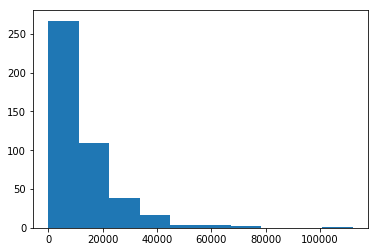

In [6]:
plt.hist(data['Fresh'])
plt.show()

([<matplotlib.patches.Wedge at 0xe01c3d0>,
 [Text(1.0971973259042975, 0.07847310385386075, ''),
  Text(-1.0971973203939083, -0.07847318089913086, '')],
 [Text(0.5984712686750714, 0.042803511193014954, '2.27'),
  Text(-0.5984712656694045, -0.042803553217707735, '97.73')])

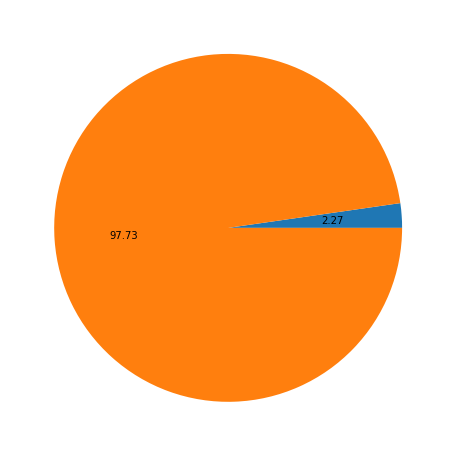

In [7]:
plt.figure(figsize = (8,8))
plt.pie(outliers['Detergents_Paper'], autopct="%.2f")

In [8]:
# Standardization

data_standarized =  (data - data.mean())/data.std()
data_standarized.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1.447005,0.589997,0.052873,0.522972,-0.041068,-0.588697,-0.043519,-0.066264
1,1.447005,0.589997,-0.390857,0.543839,0.170125,-0.269829,0.086309,0.089050
2,1.447005,0.589997,-0.446521,0.408073,-0.028125,-0.137379,0.133080,2.240742
3,-0.689512,0.589997,0.099998,-0.623310,-0.392530,0.686363,-0.498021,0.093305
4,1.447005,0.589997,0.839284,-0.052337,-0.079266,0.173661,-0.231654,1.297870


In [9]:
# Clusting uisng K-Means 
from sklearn.cluster import KMeans

In [10]:
ideal_k = []
for i in range(1,21):
    estimated_kmeans = KMeans(n_clusters=i)
    estimated_kmeans.fit(data_standarized)
    
    ideal_k.append([i,estimated_kmeans.inertia_])

In [11]:
ideal_k = np.array(ideal_k)
ideal_k

array([[1.00000000e+00, 3.51200000e+03],
       [2.00000000e+00, 2.59347786e+03],
       [3.00000000e+00, 2.14439922e+03],
       [4.00000000e+00, 1.84320072e+03],
       [5.00000000e+00, 1.55977474e+03],
       [6.00000000e+00, 1.31097571e+03],
       [7.00000000e+00, 1.19083792e+03],
       [8.00000000e+00, 1.04853836e+03],
       [9.00000000e+00, 9.80860434e+02],
       [1.00000000e+01, 9.11534580e+02],
       [1.10000000e+01, 8.44468561e+02],
       [1.20000000e+01, 8.02931828e+02],
       [1.30000000e+01, 7.61544137e+02],
       [1.40000000e+01, 7.07412639e+02],
       [1.50000000e+01, 6.82048748e+02],
       [1.60000000e+01, 6.46300838e+02],
       [1.70000000e+01, 6.28107880e+02],
       [1.80000000e+01, 6.00772212e+02],
       [1.90000000e+01, 5.75402757e+02],
       [2.00000000e+01, 5.48655907e+02]])

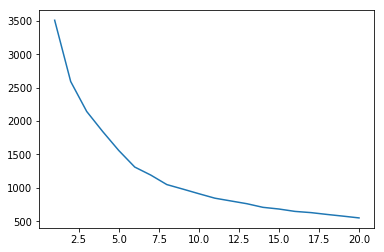

In [12]:
plt.plot(ideal_k[:,0],ideal_k[:,1])
plt.show()

In [13]:
estimated_kmeans = KMeans(n_clusters=6)

In [14]:
estimated_kmeans.fit(data_standarized)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [15]:
predicted_kMeans=estimated_kmeans.predict(data_standarized)

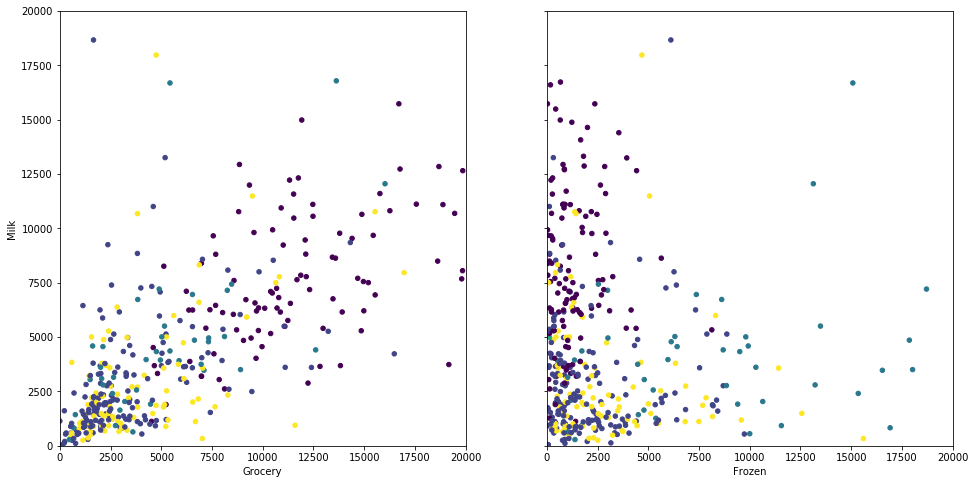

In [16]:
plt.subplots(1,2,sharex='col',sharey='row',figsize=(16,8))
plt.scatter(data.iloc[:,5],data.iloc[:,3],c=predicted_kMeans,s=20)
plt.xlim([0,20000])
plt.ylim([0,20000])
plt.xlabel('Frozen')
plt.subplot(1,2,1)
plt.scatter(data.iloc[:,4],data.iloc[:,3],c=predicted_kMeans,s=20)
plt.xlim([0,20000])
plt.ylim([0,20000])
plt.xlabel('Grocery')
plt.ylabel('Milk')
plt.show()

In [17]:
# Clustering using Mean Shift

from sklearn.cluster import MeanShift

In [18]:
estimated_MeanShift = MeanShift(bandwidth=0.4)

In [19]:
estimated_MeanShift.fit(data_standarized)

MeanShift(bandwidth=0.4, bin_seeding=False, cluster_all=True, min_bin_freq=1,
     n_jobs=None, seeds=None)

In [20]:
prediced_mean_shift = estimated_MeanShift.predict(data_standarized)

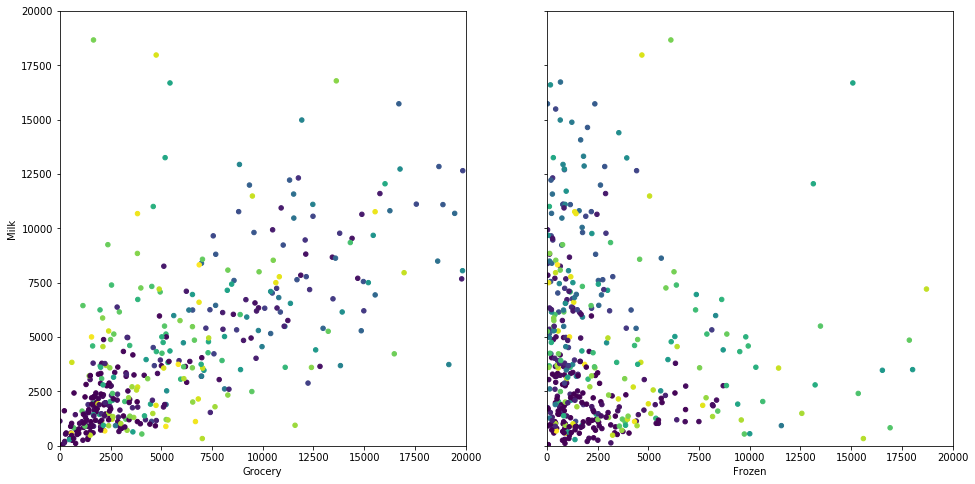

In [21]:
plt.subplots(1,2,sharex='col',sharey='row',figsize=(16,8))
plt.scatter(data.iloc[:,5],data.iloc[:,3],c=prediced_mean_shift,s=20)
plt.xlim([0,20000])
plt.ylim([0,20000])
plt.xlabel('Frozen')
plt.subplot(1,2,1)
plt.scatter(data.iloc[:,4],data.iloc[:,3],c=prediced_mean_shift,s=20)
plt.xlim([0,20000])
plt.ylim([0,20000])
plt.xlabel('Grocery')
plt.ylabel('Milk')
plt.show()

In [22]:
# Clustering using DBScan
from sklearn.cluster import DBSCAN

In [23]:
estimated_dbscan = DBSCAN(eps=0.8)
predicted_dbscan = estimated_dbscan.fit_predict(data_standarized)
predicted_dbscan

array([ 0,  0, -1,  1, -1,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  1,  0,
       -1,  0,  1,  0,  1, -1, -1, -1,  0,  1,  1, -1,  2,  1,  1,  1, -1,
        1,  0,  1,  0,  0, -1, -1,  1,  0,  0,  0, -1,  0, -1,  0, -1,  1,
        1, -1,  0,  1,  1, -1,  0,  1,  1,  0, -1,  0,  0,  1, -1,  1,  0,
        1,  1,  1, -1,  1, -1,  0,  1,  1, -1,  1,  1,  1,  0,  0,  1,  0,
       -1, -1, -1,  1,  1,  1,  1, -1, -1,  0,  1,  0,  1,  1,  1, -1,  0,
        0, -1,  1,  1,  0,  0,  0, -1,  1,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  0, -1, -1,  1,  0,  1,  2,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1, -1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  0,  0,  1,  0,  0,  0,  1,  1, -1,  0, -1,  0,  1,  1,  1,
        0, -1,  1,  0,  1,  0, -1,  1,  1,  1,  1, -1, -1, -1,  1,  1,  1,
       -1,  0,  0,  1,  1,  1,  0,  1,  1, -1, -1,  3,  3, -1, -1, -1,  3,
        3, -1,  3, -1,  3, -1,  3, -1,  3,  3, -1, -1, -1,  3, -1,  3,  3,
        3,  3, -1,  3,  3

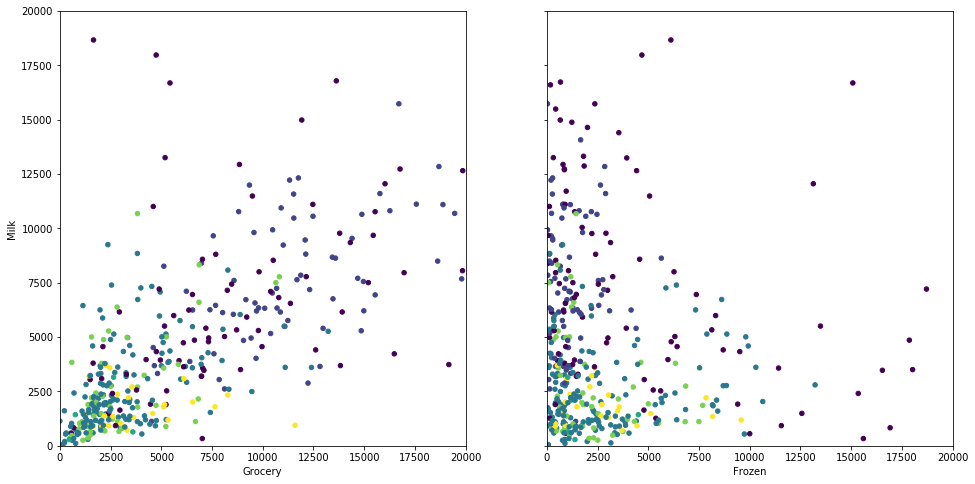

In [24]:
plt.subplots(1,2,sharex='col',sharey='row',figsize=(16,8))
plt.scatter(data.iloc[:,5],data.iloc[:,3],c=predicted_dbscan,s=20)
plt.xlim([0,20000])
plt.ylim([0,20000])
plt.xlabel('Frozen')
plt.subplot(1,2,1)
plt.scatter(data.iloc[:,4],data.iloc[:,3],c=predicted_dbscan,s=20)
plt.xlim([0,20000])
plt.ylim([0,20000])
plt.xlabel('Grocery')
plt.ylabel('Milk')
plt.show()

In [25]:
# Performance Evaluation

from sklearn.metrics import silhouette_score

In [26]:
KMeans_score = silhouette_score(data_standarized,predicted_kMeans,metric='euclidean')
MeanShift_score = silhouette_score(data_standarized,prediced_mean_shift,metric='euclidean')
DBSCAN_score = silhouette_score(data_standarized,predicted_dbscan,metric='euclidean')

print(KMeans_score,MeanShift_score,DBSCAN_score)

0.3515995342126301 0.09334580346864556 0.16856375605964766


In [27]:
from sklearn.metrics import calinski_harabaz_score

In [29]:
KMeans_score = calinski_harabaz_score(data_standarized,predicted_kMeans)
MeanShift_score = calinski_harabaz_score(data_standarized,prediced_mean_shift)
DBSCAN_score = calinski_harabaz_score(data_standarized,predicted_dbscan)

print(KMeans_score,MeanShift_score,DBSCAN_score)

145.73031893182392 112.90534400805596 42.45114955569689
